<a href="https://colab.research.google.com/github/2303A510j7/ADM/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
# 1. Load the dataset
file_path = '/content/employee_data.csv'
df = pd.read_csv(file_path)
print("Dataset before preprocessing:")
print(df.head())

Dataset before preprocessing:
   Employee_ID   Age    Salary  Job_Satisfaction  Work_Hours_Per_Week
0         1001  50.0  108953.0               9.0                   36
1         1002  36.0   82995.0               8.0                   59
2         1003  29.0   70757.0               2.0                   30
3         1004  42.0   39692.0               1.0                   30
4         1005  40.0   75758.0               7.0                   54


In [3]:
# 2. Handle missing values

# For simplicity, let's use mean imputation for numerical columns
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())

# For categorical columns, use mode imputation (most frequent value)
df['Job_Satisfaction'] = df['Job_Satisfaction'].fillna(df['Job_Satisfaction'].mode()[0])

# For Work_Hours_Per_Week, use median imputation
df['Work_Hours_Per_Week'] = df['Work_Hours_Per_Week'].fillna(df['Work_Hours_Per_Week'].median())

# Check if any missing values remain
print("\nMissing values after imputation:")
print(df.isnull().sum())



Missing values after imputation:
Employee_ID            0
Age                    0
Salary                 0
Job_Satisfaction       0
Work_Hours_Per_Week    0
dtype: int64


In [4]:
scaler_minmax = MinMaxScaler()

# Min-Max Scaling for 'Age' and 'Salary' columns using sklearn
df[['Age_MinMax', 'Salary_MinMax']] = scaler_minmax.fit_transform(df[['Age', 'Salary']])

# Manually Min-Max Scaling
df['Age_MinMax_Manual'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())
df['Salary_MinMax_Manual'] = (df['Salary'] - df['Salary'].min()) / (df['Salary'].max() - df['Salary'].min())

# Standardization for Job_Satisfaction and Work_Hours_Per_Week
# Using sklearn's StandardScaler
scaler_standard = StandardScaler()

# Standardize 'Job_Satisfaction' and 'Work_Hours_Per_Week' columns using sklearn
df[['Job_Satisfaction_Standard', 'Work_Hours_Per_Week_Standard']] = scaler_standard.fit_transform(df[['Job_Satisfaction', 'Work_Hours_Per_Week']])

# Manually Standardize
df['Job_Satisfaction_Standard_Manual'] = (df['Job_Satisfaction'] - df['Job_Satisfaction'].mean()) / df['Job_Satisfaction'].std()
df['Work_Hours_Per_Week_Standard_Manual'] = (df['Work_Hours_Per_Week'] - df['Work_Hours_Per_Week'].mean()) / df['Work_Hours_Per_Week'].std()
# Print the dataset after scaling
print(df[['Age', 'Salary', 'Age_MinMax', 'Salary_MinMax', 'Age_MinMax_Manual', 'Salary_MinMax_Manual',
          'Job_Satisfaction', 'Work_Hours_Per_Week', 'Job_Satisfaction_Standard',
          'Work_Hours_Per_Week_Standard', 'Job_Satisfaction_Standard_Manual',
          'Work_Hours_Per_Week_Standard_Manual']].head())




    Age    Salary  Age_MinMax  Salary_MinMax  Age_MinMax_Manual  \
0  50.0  108953.0    0.750000       0.877708           0.750000   
1  36.0   82995.0    0.361111       0.585375           0.361111   
2  29.0   70757.0    0.166667       0.447554           0.166667   
3  42.0   39692.0    0.527778       0.097707           0.527778   
4  40.0   75758.0    0.472222       0.503874           0.472222   

   Salary_MinMax_Manual  Job_Satisfaction  Work_Hours_Per_Week  \
0              0.877708               9.0                   36   
1              0.585375               8.0                   59   
2              0.447554               2.0                   30   
3              0.097707               1.0                   30   
4              0.503874               7.0                   54   

   Job_Satisfaction_Standard  Work_Hours_Per_Week_Standard  \
0                   1.275854                     -0.905969   
1                   0.872103                      1.483629   
2             


Dataset after preprocessing:
   Employee_ID   Age    Salary  Job_Satisfaction  Work_Hours_Per_Week  \
0         1001  50.0  108953.0               9.0                   36   
1         1002  36.0   82995.0               8.0                   59   
2         1003  29.0   70757.0               2.0                   30   
3         1004  42.0   39692.0               1.0                   30   
4         1005  40.0   75758.0               7.0                   54   

   Age_MinMax  Salary_MinMax  Age_MinMax_Manual  Salary_MinMax_Manual  \
0    0.750000       0.877708           0.750000              0.877708   
1    0.361111       0.585375           0.361111              0.585375   
2    0.166667       0.447554           0.166667              0.447554   
3    0.527778       0.097707           0.527778              0.097707   
4    0.472222       0.503874           0.472222              0.503874   

   Job_Satisfaction_Standard  Work_Hours_Per_Week_Standard  \
0                   1.275854  

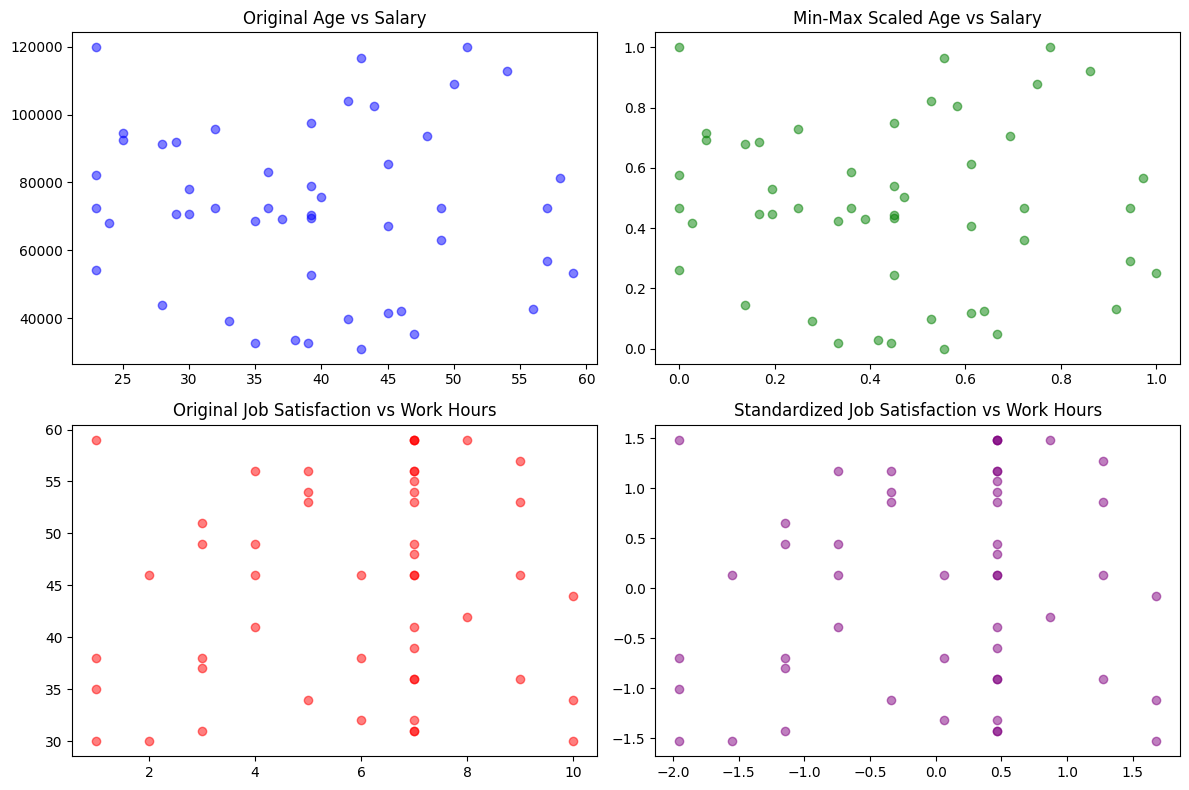

In [5]:
# 4. Display the dataset after preprocessing
print("\nDataset after preprocessing:")
print(df.head())

# Save the preprocessed dataset to a new CSV (optional)
df.to_csv('preprocessed_employee_data.csv', index=False)

# Plotting distributions before and after scaling (optional for visualization)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plotting original Age vs Salary
axes[0, 0].scatter(df['Age'], df['Salary'], color='blue', alpha=0.5)
axes[0, 0].set_title('Original Age vs Salary')

# Plotting Min-Max scaled Age vs Salary
axes[0, 1].scatter(df['Age_MinMax'], df['Salary_MinMax'], color='green', alpha=0.5)
axes[0, 1].set_title('Min-Max Scaled Age vs Salary')

# Plotting Standardized Job Satisfaction vs Work Hours
axes[1, 0].scatter(df['Job_Satisfaction'], df['Work_Hours_Per_Week'], color='red', alpha=0.5)
axes[1, 0].set_title('Original Job Satisfaction vs Work Hours')

# Plotting Standardized Job Satisfaction vs Work Hours (Standardized)
axes[1, 1].scatter(df['Job_Satisfaction_Standard'], df['Work_Hours_Per_Week_Standard'], color='purple', alpha=0.5)
axes[1, 1].set_title('Standardized Job Satisfaction vs Work Hours')

plt.tight_layout()
plt.show()